In [1]:
print("python is working here")

python is working here


# Predicting Heart Disease using Machine Learning

## Problem statement
> Given the clinical data can we predict if patients have heart disease or not

### Column description

Sure, here's a breakdown of the columns present in the Kaggle dataset "HeartDiseases":

1. **age**: The age of the individual in years.
   
2. **sex**: Gender of the individual:
    - 0: Female
    - 1: Male

3. **cp**: Chest pain type experienced by the individual:
    - 0: Typical angina
    - 1: Atypical angina
    - 2: Non-anginal pain
    - 3: Asymptomatic

4. **trestbps**: Resting blood pressure (in mm Hg) of the individual when admitted to the hospital.

5. **chol**: Serum cholesterol (in mg/dl) level of the individual.

6. **fbs**: Fasting blood sugar > 120 mg/dl:
    - 0: False
    - 1: True

7. **restecg**: Resting electrocardiographic results:
    - 0: Normal
    - 1: Having ST-T wave abnormality
    - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalach**: Maximum heart rate achieved by the individual.

9. **exang**: Exercise-induced angina:
    - 0: No
    - 1: Yes

10. **oldpeak**: ST depression induced by exercise relative to rest.

11. **slope**: Slope of the peak exercise ST segment:
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping

12. **ca**: Number of major vessels (0-3) colored by fluoroscopy.

13. **thal**: A blood disorder called thalassemia:
    - 0: NULL (dropped from the dataset)
    - 1: Normal
    - 2: Fixed defect
    - 3: Reversible defect

14. **target**: Presence of heart disease:
    - 0: Absence
    - 1: Presence

This dataset seems to be related to heart disease diagnosis and contains various features that could potentially be used to predict the presence or absence of heart disease in individuals.


### Evaluation

* 95% accuracy is needed as its a health care project
* 0 false positive.

In [2]:
# Import the libraries
import pandas as pd
from sklearn.metrics import RocCurveDisplay 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time

# modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

# model evaluation libraries(metrics)
from sklearn.metrics import classification_report, accuracy_score,  f1_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score




%matplotlib inline

In [3]:
    import sklearn
    sklearn.__version__ # will print out the version number

'1.3.0'

In [4]:
#Import dataset
df=pd.read_csv("./heart-disease.csv")

In [5]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# smaller dataset
df.shape

(303, 14)

In [8]:
# no na found - no missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory data analysis

#### The goal here is to become a subject matter expert in provided dataset

    1. What problem you are trying to solve?
    2. What kind of data do we have?
    3. What's missing from data and how to deal with it?
    4. Where are the outliers and why should you care about them?
    5. How can you add change or remove feature to get most out of the data?

In [9]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0


In [10]:
df.target.value_counts()


target
1    165
0    138
Name: count, dtype: int64

#### This dataset is a balanced dataset.

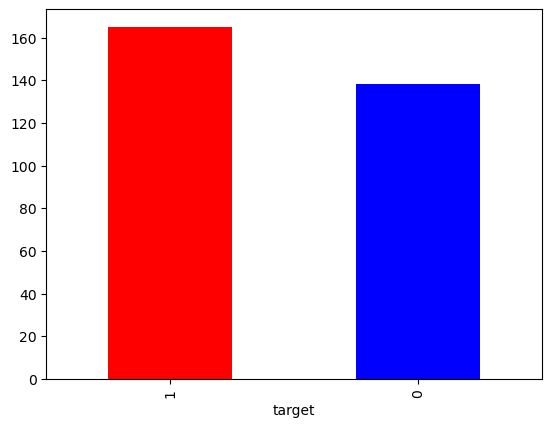

In [11]:
df.target.value_counts().plot(kind="bar",color=["red","blue"]);

In [12]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency with respect to sex

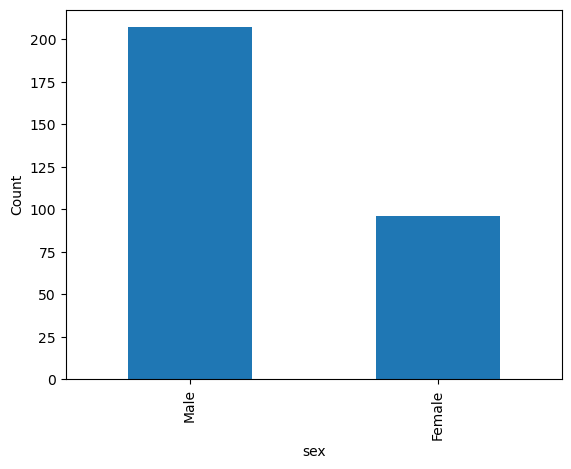

In [14]:
df.sex.value_counts().plot(kind="bar");
plt.xticks(ticks=[0,1],labels=["Male","Female"]);
plt.ylabel('Count');


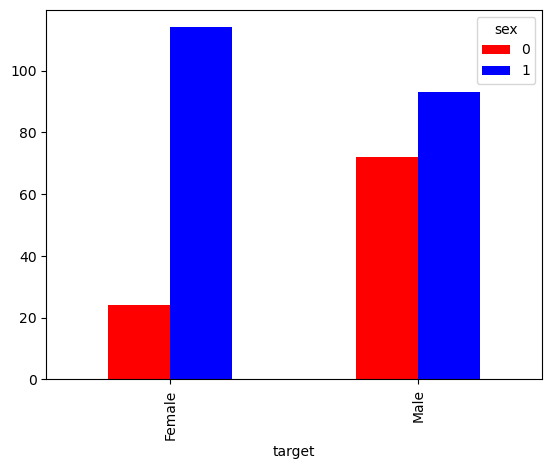

In [15]:
sex_target_df=pd.crosstab(df.target,df.sex)
sex_target_df.plot(kind="bar",color=["red","blue"]);
plt.xticks(ticks=[0,1],labels=["Female","Male"]);

#### most feamles have heart disease

### Analysis for each column

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


fig=plt.figure(figsize=(15,15));

import math
col_len = len(df.columns)
col_sqrt = math.ceil (math.sqrt(col_len))

for i,col in enumerate(df.columns):
    ax1=fig.add_subplot(col_sqrt,col_sqrt,i+1)
    if col=="target":
        continue
    elif col in ["age"]:    
        ax1.set(title="target/"+col,xlabel="Target",ylabel=col);
        plt.scatter(df.age,df.target,color=["red","blue"]);
    elif col in ["sex"]:
        target_df=pd.crosstab(df.target,df.sex)
        target_df.plot(kind="bar",color=["red","blue"],);
        plt.xticks(ticks=[0,1],labels=["Female","Male"]);    

plt.subplots_adjust(hspace=0.5, wspace=0.5);
plt.plot()    

### Age vs Max Heart Rate for the Heart Disease 


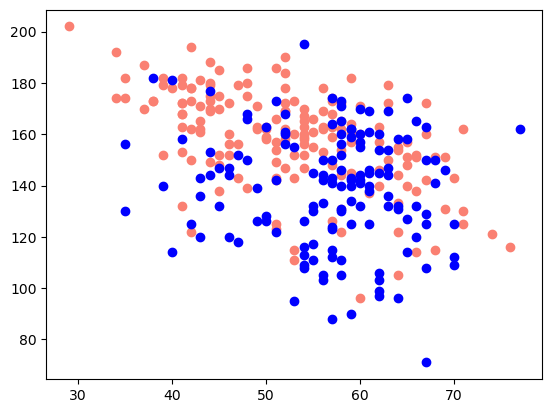

In [17]:
plt.Figure(figsize=(15,15));

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon"); 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="blue"); 
plt.plot();

### Check the distribution of the age column with the histograms

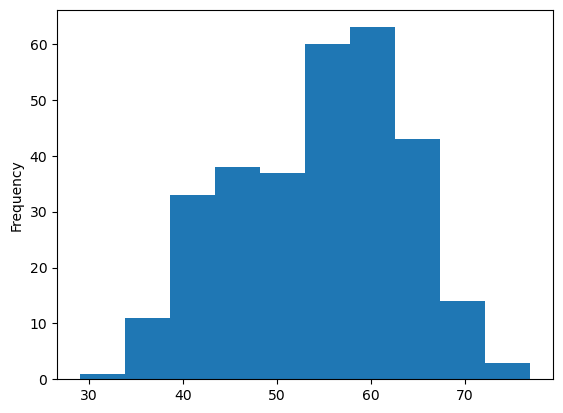

In [18]:
df.age.plot.hist();

3. **cp**: Chest pain type experienced by the individual:
    - 0: Typical angina
    - 1: Atypical angina
    - 2: Non-anginal pain
    - 3: Asymptomatic

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
cp_df=pd.crosstab(df.cp,df.target)

In [21]:
cp_df

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


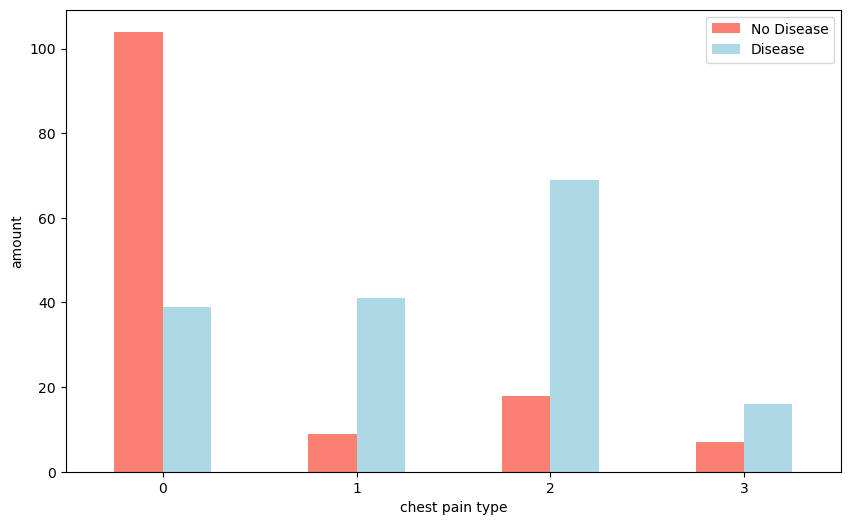

In [22]:
cp_df.plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.xlabel("chest pain type");
plt.ylabel("amount");
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);


In [23]:
corr_matrix = df.corr()

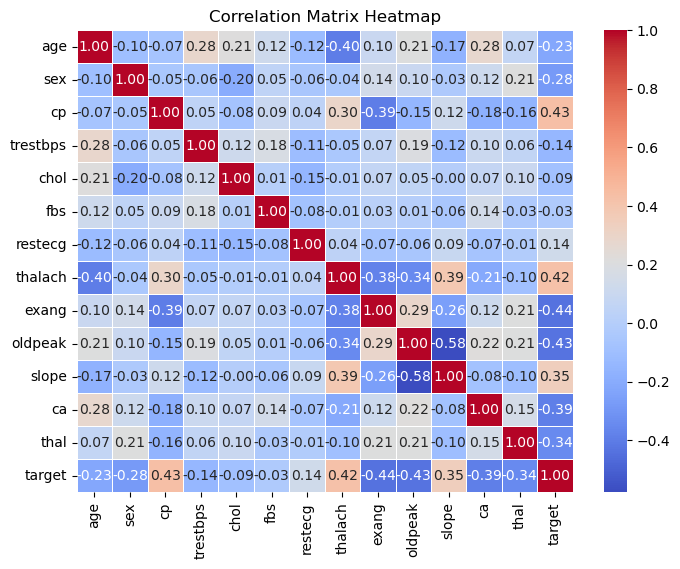

In [24]:
# Plotting the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', 
            linewidths=0.5,
            annot_kws={"size": 10},
            );
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
X=df.drop("target",axis=1)
y=df["target"]

In [26]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # 80% for training and 20% for testing.   


In [27]:
print(len(X_train)+len(X_test))
print(df.shape,X_train.shape,X_test.shape)


303
(303, 14) (242, 13) (61, 13)


### Build a Machine Learning Model

#### 3 models :-  RandomForest, LogisticRegression, KNN
##### Random Forest
###### key Hps are - 
* n_estimators(recommended to use a range of values rather than a list)
* max-depth
* min-sample-split
* min-sample-leaf

#### VVI Key: Verbose=True:
1. output for Radomized search for each fold cv.
2.Dont use it with grid search

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,auc,roc_curve
from scipy.stats import randint


In [29]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [30]:
# Define hyperparameters and their ranges for tuning
param_dist = {
    'n_estimators': [600,700,750,800,900,1000],  # Number of trees
    'max_depth': [19,24,28,32],       # Maximum depth of trees
    'min_samples_split': [2,3,4,5],# Minimum samples required to split a node
    'min_samples_leaf': [2,4,6,8,10] # Minimum samples required at each leaf node
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, 
                                   n_iter=10, cv=5, random_state=42, scoring='accuracy')

# Compute the evaluation time of the classification
start_time = time.time()

random_search.fit(X_train, y_train)

end_time = time.time()
eval_time = end_time - start_time
print(f"Evaluation time: {eval_time:.2f} seconds")


Evaluation time: 44.91 seconds


In [31]:

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print('Best Parameters:')
for param_name, param_value in best_params.items():
    print(f'{param_name}: {param_value}')

# Get the best score
best_score = random_search.best_score_
print(f'Best Mean Cross-validated Score: {best_score:.4f}')

Best Parameters:
n_estimators: 700
min_samples_split: 4
min_samples_leaf: 4
max_depth: 28
Best Mean Cross-validated Score: 0.8181


In [32]:
random_search.score(X_train, y_train)

0.9297520661157025

In [33]:
y_pred = random_search.predict(X_test)

In [34]:
len(y_pred)

61

In [35]:
accuracy_score(y_test, y_pred)

0.8688524590163934

In [36]:
# Calculate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [37]:
# Predict probabilities for the positive class (class 1)
y_prob = random_search.predict_proba(X_test)[:, 1]

The AUC (Area Under the ROC Curve) score is a metric used to evaluate the performance of a binary classification model. It measures the area under the Receiver Operating Characteristic (ROC) curve, which represents the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various threshold settings.

The AUC score typically ranges from 0 to 1, where:

- AUC = 1: Represents a perfect classifier that has perfect discrimination between positive and negative classes. It means the model can perfectly distinguish between the two classes.
- AUC = 0.5: Represents a classifier that performs no better than random chance. It indicates that the model has no discriminatory ability between the classes.
- AUC < 0.5: Indicates that the model's predictions are worse than random guessing. This often suggests a problem with the model or data.

Determining an "ideal" AUC score depends on the context of the problem, the nature of the data, and the domain-specific requirements. In general:

- AUC > 0.8: Considered very good; the model has a strong discriminatory ability.
- AUC between 0.7 and 0.8: Considered acceptable for many practical applications.
- AUC < 0.7: Might indicate the need for improvement or further analysis.

However, the interpretation of the AUC score should be done in conjunction with other metrics and domain knowledge. Some datasets or problems might require higher discrimination, while in other cases, a lower AUC might still be useful.

It's essential to select an evaluation metric that aligns with the specific goals and requirements of the problem you are working on. For instance, in certain scenarios (e.g., medical diagnosis), even a slightly higher AUC score might significantly impact the model's usefulness and adoption.

Always consider the context, consequences of false positives and false negatives, and the domain-specific implications while interpreting the AUC score. Additionally, compare the AUC score with other metrics like accuracy, precision, recall, and the specific requirements of the problem to determine the model's overall performance.

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score,f1_score, precision_score, recall_score,roc_auc_score

# Assuming y_prob are predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'AUC: {auc:.4f}')

AUC: 0.9418


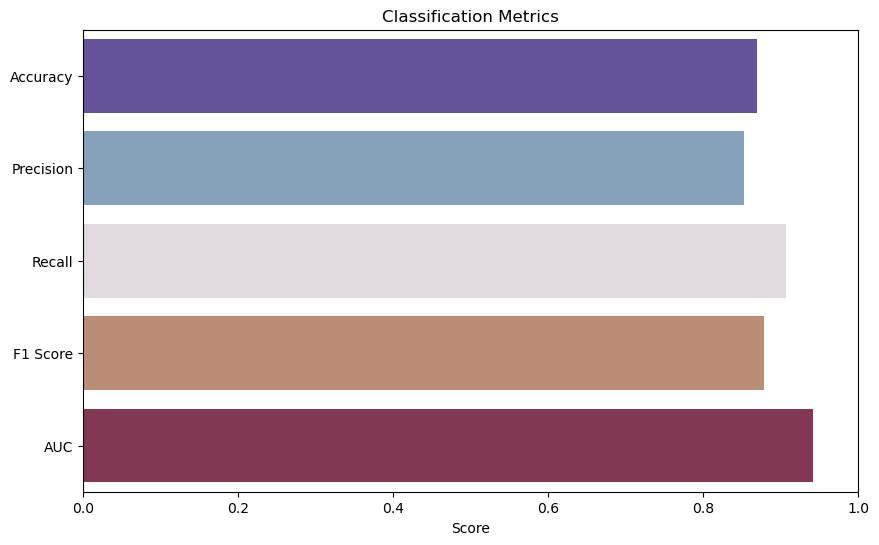

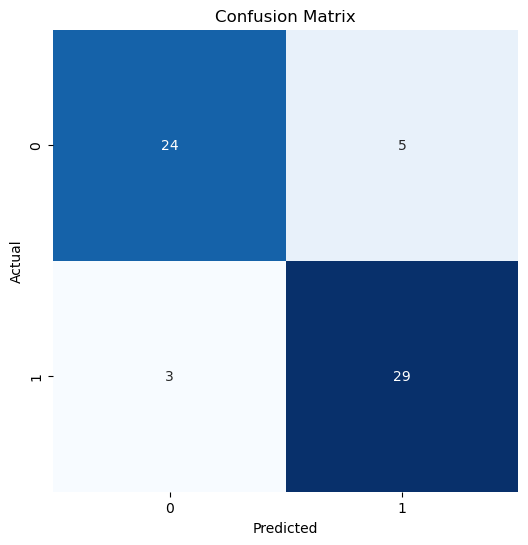

In [39]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting metrics using seaborn
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
values = [accuracy, precision, recall, f1, auc]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='twilight_shifted')
plt.title('Classification Metrics')
plt.xlabel('Score')
plt.xlim(0, 1)  # Set x-axis limit to match score range
plt.show()

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Ignore a specific type of warning (for example, FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define hyperparameters and their ranges for tuning
param_dist = {
    'n_neighbors': list(range(1, 21)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2],  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
    "metric":["euclidean","manhattan"],
    "leaf_size":list(range(1, 40,2)),
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=knn_classifier, param_distributions=param_dist, 
                                   n_iter=10, cv=5, random_state=42, scoring='accuracy')
# Compute the evaluation time of the classification
start_time = time.time()

random_search.fit(X_train.values, y_train)

end_time = time.time()
eval_time = end_time - start_time
print(f"Evaluation time: {eval_time:.2f} seconds")

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print('Best Parameters:', best_params)

# Predict on the test set using the best model from RandomizedSearchCV
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test.values)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Evaluation time: 0.26 seconds
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 27}
Accuracy: 0.6885


In [42]:
random_search.score(X_test.values, y_test)

0.6885245901639344

In [43]:
y_pred = random_search.predict(X_test)

/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [44]:
accuracy_score(y_test, y_pred)

0.6885245901639344

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score,f1_score, precision_score, recall_score,roc_auc_score

# Assuming y_prob are predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'AUC: {auc:.4f}')

AUC: 0.9418


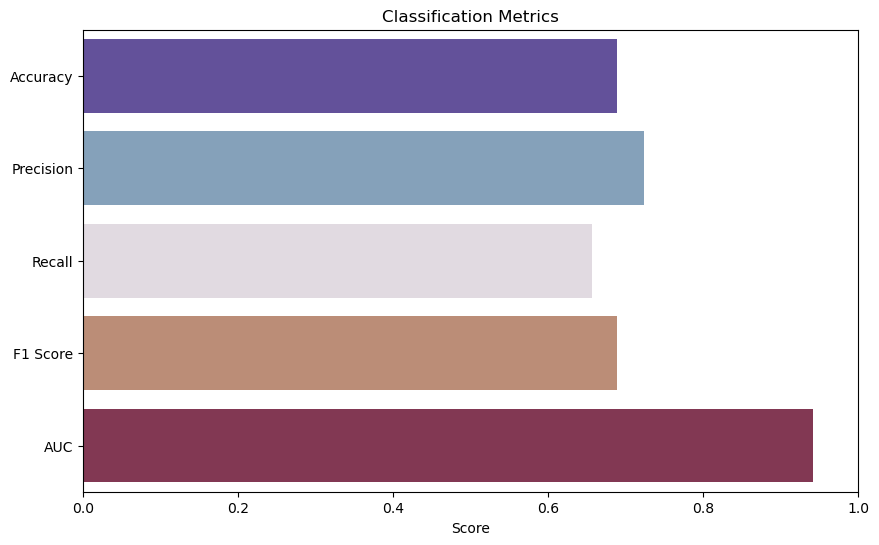

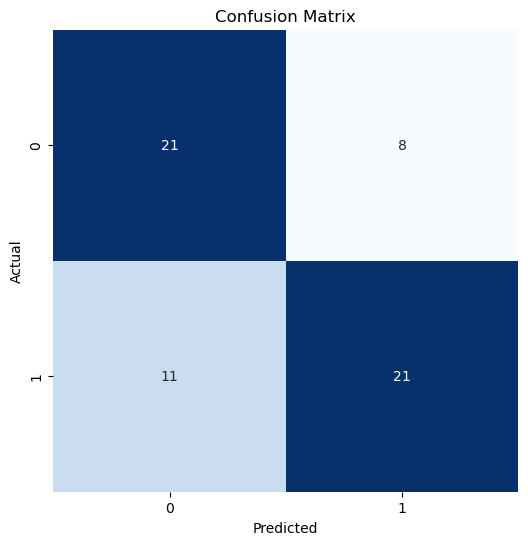

In [46]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting metrics using seaborn
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
values = [accuracy, precision, recall, f1, auc]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='twilight_shifted')
plt.title('Classification Metrics')
plt.xlabel('Score')
plt.xlim(0, 1)  # Set x-axis limit to match score range
plt.show()

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

#### After careful research C is the most important hp for logistic Regression.

Hyperparameters are
['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose']

In [47]:
from  sklearn.svm import LinearSVC
from scipy.stats import randint, uniform

In [48]:
# Create an SVM classifier
svm_classifier = LinearSVC()

# Define hyperparameters and their distributions for tuning
param_dist = {
    'C': uniform(0.1, 10),  # Inverse of regularization strength
    'class_weight': [None, 'balanced'],  # Adjusts the class weights
    'dual': [True, False],  # Dual or primal formulation
    'fit_intercept': [True, False],  # Whether to fit the intercept
    'intercept_scaling': [1],  # Scaling factor for intercept
    'loss': ['hinge', 'squared_hinge', 'log', 'modified_huber'],  # Loss function
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'multi_class': ['ovr', 'multinomial', 'auto'],  # Multi-class option
    'penalty': ['l1', 'l2', 'none'],  # Regularization penalty
    'random_state': [42],  # Seed for random number generation
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
     # Verbosity of the output
}

In [49]:
# Perform RandomizedSearchCV for hyperparameter tuning
# param_distributions=param_dist,
random_search = RandomizedSearchCV(estimator=svm_classifier,param_distributions=param_dist,
                                   n_iter=100, cv=7, random_state=42, scoring='accuracy')
# Compute the evaluation time of the classification
start_time = time.time()

random_search.fit(X_train, y_train)

end_time = time.time()
eval_time = end_time - start_time
print("^@"*100)
print(f"Evaluation time: {eval_time:.2f} seconds")

/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinea

^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@^@
Evaluation time: 0.96 seconds


/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
672 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/udit/a

In [50]:

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print('Best Parameters:', best_params)

# Predict on the test set using the best model from RandomizedSearchCV
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test.values)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 2.76781014275285, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 300, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'tol': 0.001}
Accuracy: 0.8525


/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [51]:
accuracy_score(y_test, y_pred)

0.8524590163934426

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score,f1_score, precision_score, recall_score,roc_auc_score

# Assuming y_prob are predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'AUC: {auc:.4f}')

AUC: 0.9418


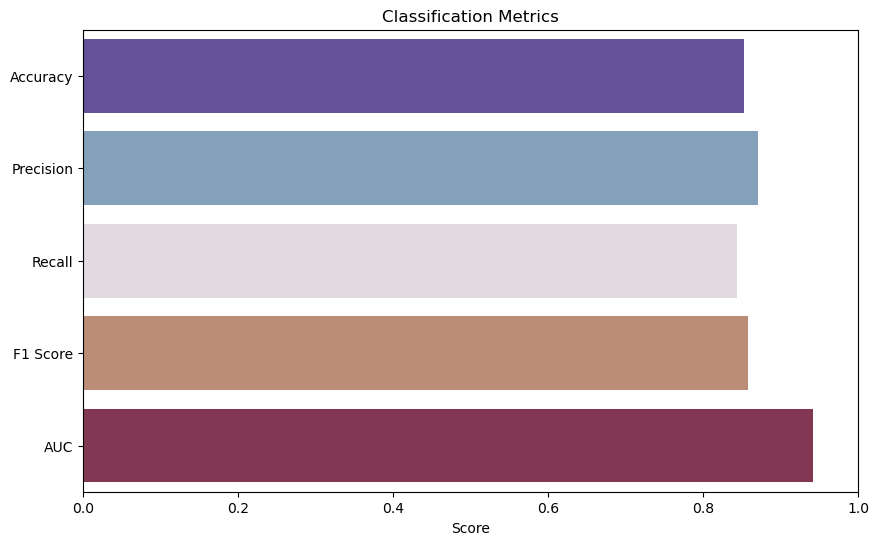

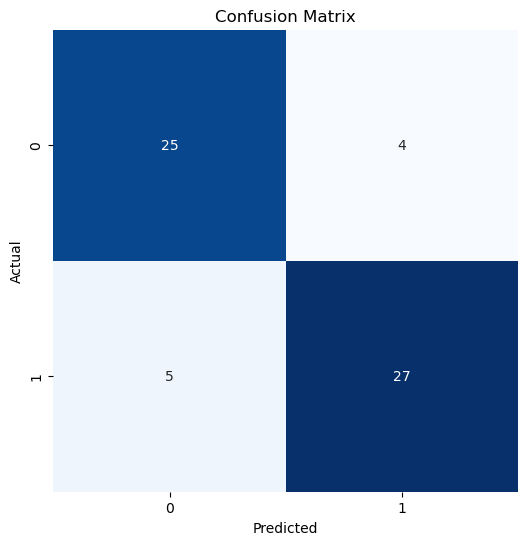

In [53]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting metrics using seaborn
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
values = [accuracy, precision, recall, f1, auc]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='twilight_shifted')
plt.title('Classification Metrics')
plt.xlabel('Score')
plt.xlim(0, 1)  # Set x-axis limit to match score range
plt.show()

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Important Considerations
1. Hyperparameter Tuning
2. Feature Importance
#### Specific to classifications
3. Confusion Matrix
4. Cross-Validation
5. Precision
6. Recall
7. F1-score
8. Classification-report
9. ROC curve
10.Area under curve


### 3 ways to do hyperparameter tuning
1. Grid Search - waste of time(consumes lots of resources. do if for each combination of params provided...do it for the final model,strictly not recomended for experiments...)
2. Randomized Serach: best. 
3. By Hand: not recommended

### Check the performance with the GridSearchCV

###### Random forest Classifier params list
['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].


In [54]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define hyperparameters and their ranges for tuning
param_grid = {
    'n_estimators': [600,700,750,800,900,1000],  # Number of trees
    'max_depth': [19,24,28,32],       # Maximum depth of trees
    'min_samples_split': [2,3,4,5],# Minimum samples required to split a node
    'min_samples_leaf': [2,4,6,8,10] # Minimum samples required at each leaf node
}


Result with Randomcv

In [55]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Predict on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

ValueError: Invalid parameter 'max_depth' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

In [ ]:
# Create an SVM classifier
svm_classifier = LinearSVC()

# Define hyperparameters and their distributions for tuning
param_grid_svc = {
    'C': list(range(1,10,2)),  # Inverse of regularization strength
    'class_weight': [None, 'balanced'],  # Adjusts the class weights
    'dual': [True, False],  # Dual or primal formulation
    'fit_intercept': [True, False],  # Whether to fit the intercept
    'intercept_scaling': [1],  # Scaling factor for intercept
    'loss': ['hinge', 'squared_hinge', 'log', 'modified_huber'],  # Loss function
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'multi_class': ['ovr', 'multinomial', 'auto'],  # Multi-class option
    'penalty': ['l1', 'l2', 'none'],  # Regularization penalty
    'random_state': [42],  # Seed for random number generation
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
}

In [ ]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svc, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Predict on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinea

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'tol': 0.001}
Accuracy: 0.8525


/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(




### 1. Tree-Based Models (Random Forest, Gradient Boosting, etc.):
Tree-based models inherently provide feature importance scores based on how much each feature decreases impurity across all trees in the ensemble.

#### Example using Random Forest:
```python
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train contain your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
```

### 2. Permutation Importance:
This method evaluates feature importance by shuffling feature values and measuring the drop in model performance when the feature is shuffled.

#### Example using permutation importance:
```python
from sklearn.inspection import permutation_importance

# Assuming model is your trained classifier
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = result.importances_mean
```

### 3. Feature Selection with SelectFromModel:
Use `SelectFromModel` to select features based on a specific threshold of importance.

#### Example using SelectFromModel:
```python
from sklearn.feature_selection import SelectFromModel

# Assuming clf is your classifier
selector = SelectFromModel(clf, threshold=0.1)  # Adjust threshold as needed
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
```

### 4. SHAP (SHapley Additive exPlanations):
SHAP values estimate the contribution of each feature to the prediction. They can be used with various models to understand feature importance.

#### Example using SHAP (with a tree-based model):
```python
import shap

# Assuming model is your trained model (e.g., RandomForest)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
```

Choose the method that best suits your dataset and model. These methods provide valuable insights into understanding feature importance in classification tasks, aiding in feature selection and model interpretability. Adjust parameters and methods based on your specific dataset and problem requirements.

In [60]:
from sklearn.inspection import permutation_importance

# Assuming model is your trained classifier
svm_classifier.fit(X_train, y_train)
result = permutation_importance(svm_classifier, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = result.importances_mean


/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:
feature_importance
df=pd.DataFrame(feature_importance.reshape(1,13),columns=X.columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.0,0.003279,0.078689,0.0,0.0,0.0,0.0,0.032787,0.009836,0.02623,0.011475,0.047541,0.003279


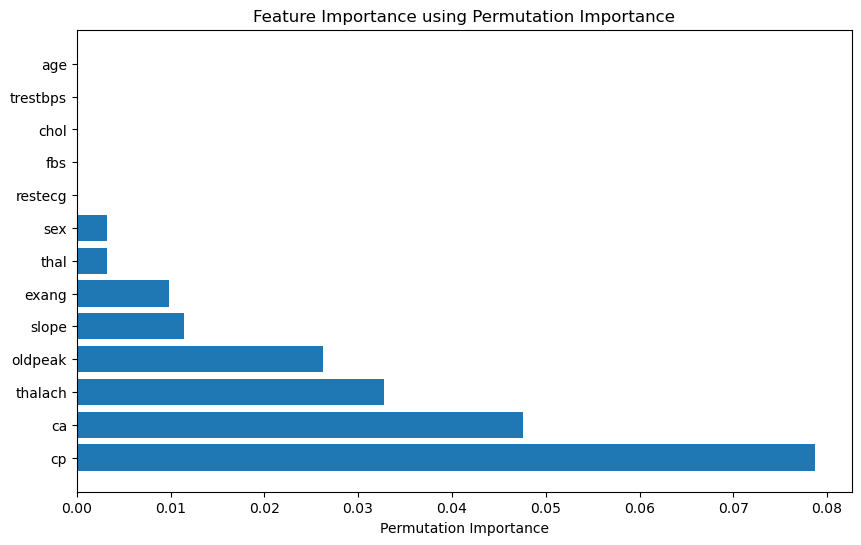

In [63]:

feature_names = X.columns  # Assuming X is a pandas DataFrame

# Visualize the Feature Importance
import matplotlib.pyplot as plt

sorted_idx = feature_importance.argsort()[::-1]  # Sort indices by importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance')
plt.show()

rejected by another mehod->['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach']

In [66]:
from sklearn.feature_selection import SelectFromModel

# Assuming clf is your classifier
selector = SelectFromModel(svm_classifier, threshold=0.1)  # Adjust threshold as needed
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]

selected_features

/home/udit/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Index(['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

In [67]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [68]:
list(X.columns)

['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [69]:
list(X.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [72]:
filtered_cols = [item for item in list(X.columns) if item not in list(selected_features)]

In [73]:
filtered_cols

['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach']

In [74]:
svm_classifier.coef_

array([[ 0.00433777, -0.2021268 ,  0.23868419, -0.00250005, -0.0006543 ,
         0.0137699 ,  0.06524362,  0.00645462, -0.16011932, -0.22188748,
         0.11996098, -0.22282324, -0.2023331 ]])

In [75]:
df=pd.DataFrame(svm_classifier.coef_.reshape(1,13),columns=X.columns)

In [76]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.004338,-0.202127,0.238684,-0.0025,-0.000654,0.01377,0.065244,0.006455,-0.160119,-0.221887,0.119961,-0.222823,-0.202333


## You can take it to business to underastand each feature and understand how one is related to another.

<Axes: >

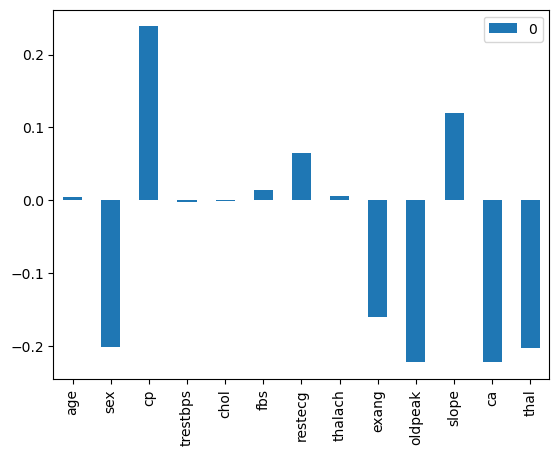

In [77]:
df.T.plot.bar()

# Experimentation

* Could you collect more data?
* try a better model like CATBOOST or XGBOOST?
* improve the current model
* if model has jit the metric how to export and share it with others